## Architecture Flow

1. Feature Extraction using VGG16 --> Extract Embeddings from each image
2. Perform Aggregations --> Multiple images from different angles of a different shoe is aggregated to 'summarize' features. In this particular notebook, mean and max is performed. 
3. Compute Cosine Similarity with user input.

### Current Advantage of this Approach
1. Able to recognize inputs from various angles.
2. Able to recommend very similar shoes (if exist in database) based on style, color, and shape. If the price of these shoes are different, it may allow the user to choose relevant shoes with a lower budget.

### Room for Improvements

1. Experiment on Feature Extractor (ResNet, CLIP, etc.)
2. Currently, simple statistical aggregations are performed.

- Pros: No extra training, simple, lightweight, fast. 
- Cons: Might lose importante features during aggregation. 

    For future iterations, employing attention-based models for a more representative embedding per sneaker

3. Adding additional criterias (user preferences, price, other similarities) for more refined relevance

In [5]:
import os 

# len(os.listdir('pics/')[0]

database = 'pics/'
for shoe in range(0, len(os.listdir(database))):
    print(os.listdir(database)[shoe])
    current_shoe_path = database + os.listdir(database)[0] 
    print(os.listdir(current_shoe_path))

New Balance 550 White Nightwatch Green
['img35.jpg', 'img20.jpg', 'img30.jpg', 'img25.jpg', 'img5.jpg', 'img1.jpg', 'img15.jpg', 'img10.jpg']
Air Jordan 1 Mid Lakers 2022
['img35.jpg', 'img20.jpg', 'img30.jpg', 'img25.jpg', 'img5.jpg', 'img1.jpg', 'img15.jpg', 'img10.jpg']
Nike Dunk Low Grey Panda Volt
['img35.jpg', 'img20.jpg', 'img30.jpg', 'img25.jpg', 'img5.jpg', 'img1.jpg', 'img15.jpg', 'img10.jpg']
Nike Dunk Low Setsubun 2022
['img35.jpg', 'img20.jpg', 'img30.jpg', 'img25.jpg', 'img5.jpg', 'img1.jpg', 'img15.jpg', 'img10.jpg']
adidas Yeezy Boost 350 V2 Flax
['img35.jpg', 'img20.jpg', 'img30.jpg', 'img25.jpg', 'img5.jpg', 'img1.jpg', 'img15.jpg', 'img10.jpg']
Nike Air Max 1 Corduroy Baltic Blue
['img35.jpg', 'img20.jpg', 'img30.jpg', 'img25.jpg', 'img5.jpg', 'img1.jpg', 'img15.jpg', 'img10.jpg']
Crocs Pollex Clog by Salehe Bembury Tide
['img35.jpg', 'img20.jpg', 'img30.jpg', 'img25.jpg', 'img5.jpg', 'img1.jpg', 'img15.jpg', 'img10.jpg']
Nike Dunk Low Rose Whisper W
['img35.jpg', 'i

Feature Extraction

___

In [6]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.applications import VGG16 
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image 
from sklearn.metrics.pairwise import cosine_similarity

base_model = VGG16(weights='imagenet', include_top=False)
model = tf.keras.Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(224, 224))  # Resize
    img_array = image.img_to_array(img)  # Convert to array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dim
    img_array = preprocess_input(img_array)  # Normalize for VGG16
    features = model.predict(img_array)  # Extract features
    
    return features.flatten()  # Flatten feature map


sneaker_features = {}

for sneaker_name in os.listdir(database):
    sneaker_path = os.path.join(database, sneaker_name)
    if os.path.isdir(sneaker_path):
        all_features = []
        
        # Extract features for each image of the sneaker
        for img_name in os.listdir(sneaker_path):
            img_path = os.path.join(sneaker_path, img_name)
            features = extract_features(img_path)
            all_features.append(features)

        # Convert to NumPy array
        all_features = np.array(all_features)

        # Average Pooling
        avg_embedding = np.mean(all_features, axis=0)

        # Max Pooling
        max_embedding = np.max(all_features, axis=0)

        # Store embeddings
        sneaker_features[sneaker_name] = {"avg": avg_embedding, "max": max_embedding}

# Function to find similar sneakers using cosine similarity
def find_similar_sneakers(query_img_path, method="avg", top_k=3):
    query_features = extract_features(query_img_path)
    similarities = []

    for sneaker_name, embeddings in sneaker_features.items():
        sneaker_embedding = embeddings[method]
        similarity = cosine_similarity([query_features], [sneaker_embedding])[0][0]
        similarities.append((sneaker_name, similarity))

    similarities.sort(key=lambda x: x[1], reverse=True)
    return similarities[:top_k]

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 601ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 809ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 522ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 746ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 730ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 521ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 477ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 718ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 717ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 597ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 715ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 568ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 552ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 594ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/

In [ ]:
# Example usage
query_img = "pics/adidas Campus 80s South Park Towelie/img1.jpg" 
print("Top-3 Sneakers (Avg Pooling):", find_similar_sneakers(query_img, method="avg"))
print("Top-3 Sneakers (Max Pooling):", find_similar_sneakers(query_img, method="max"))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Top-3 Sneakers (Avg Pooling): [('adidas Campus 80s South Park Towelie', 0.75972116), ('adidas Gazelle Indoor Collegiate Green', 0.64094204), ('adidas Samba Team Mexico', 0.60987973)]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
Top-3 Sneakers (Max Pooling): [('adidas Campus 80s South Park Towelie', 0.6651056), ('adidas Gazelle Indoor Collegiate Green', 0.56832564), ('adidas Samba OG Kith Classics Program White', 0.5541994)]


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


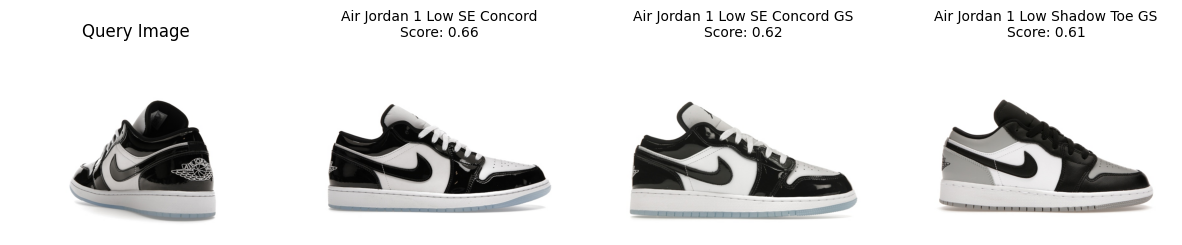

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step


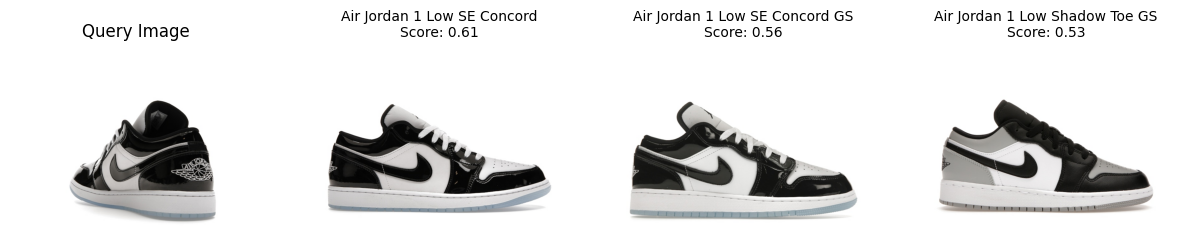

In [30]:
import matplotlib.pyplot as plt
import cv2

# Function to display query and top-3 retrieved sneakers
def display_results(query_img_path, method="avg", top_k=3):
    results = find_similar_sneakers(query_img_path, method=method, top_k=top_k)

    # Load and show the query image
    query_img = cv2.imread(query_img_path)
    query_img = cv2.cvtColor(query_img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB

    fig, axes = plt.subplots(1, top_k + 1, figsize=(15, 5))  # Create subplots
    axes[0].imshow(query_img)
    axes[0].set_title("Query Image", fontsize=12)
    axes[0].axis("off")

    # Load and show the top-k retrieved sneakers
    for i, (sneaker_name, similarity) in enumerate(results):
        sneaker_img_path = os.path.join(database, sneaker_name, "img1.jpg")  # Show 1st image
        retrieved_img = cv2.imread(sneaker_img_path)
        retrieved_img = cv2.cvtColor(retrieved_img, cv2.COLOR_BGR2RGB)

        axes[i + 1].imshow(retrieved_img)
        axes[i + 1].set_title(f"{sneaker_name}\nScore: {similarity:.2f}", fontsize=10)
        axes[i + 1].axis("off")

    plt.show()

# Example usage
query_img = "pics/Air Jordan 1 Low SE Concord/img25.jpg"
display_results(query_img, method="avg")
display_results(query_img, method="max")